C:\Users\tes's\AppData\Local\Temp\ipykernel_25896\3900806689.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(RAW_DATA_PATH)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

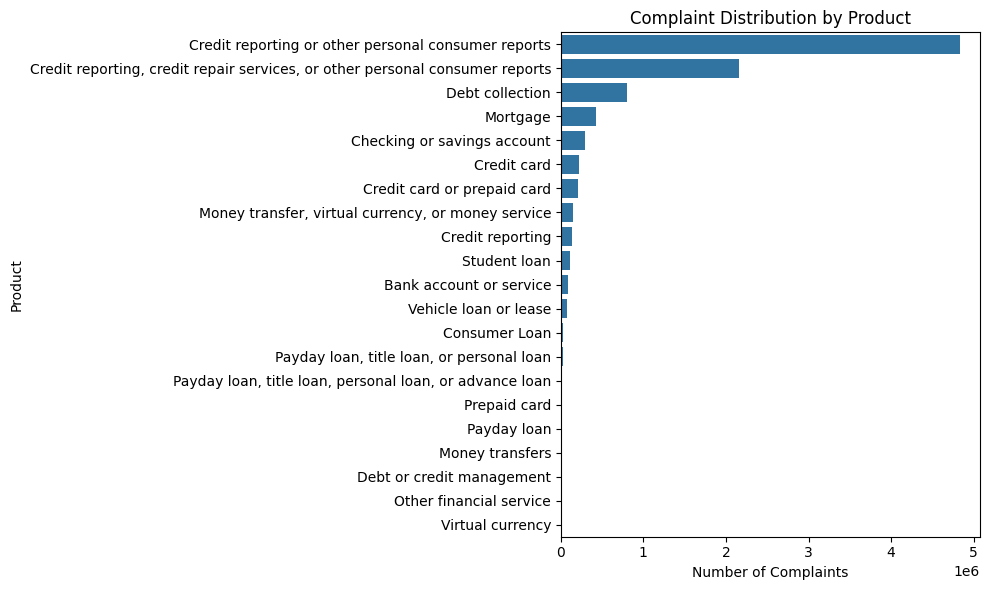


Narrative Length Statistics:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64


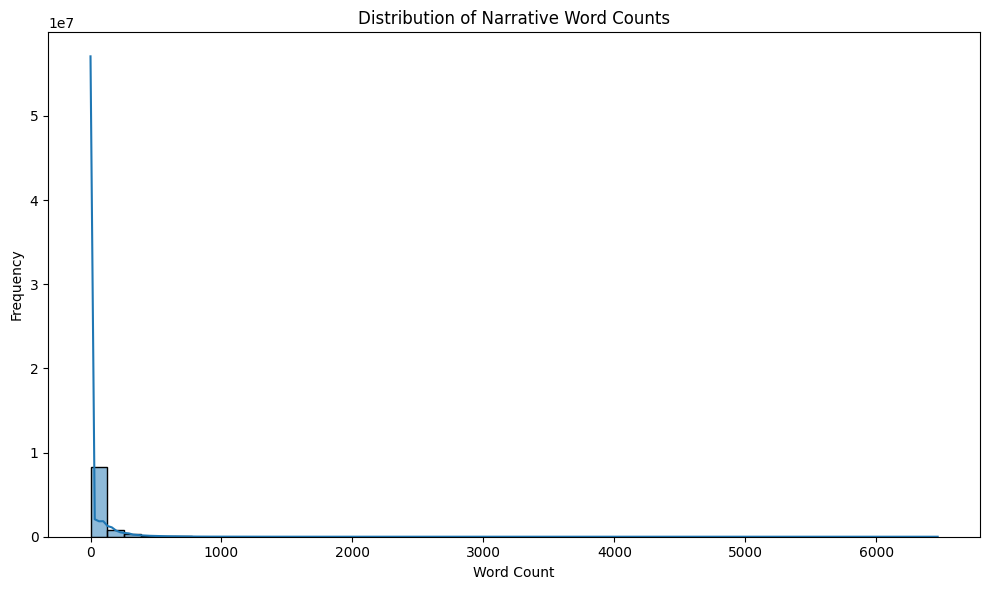


Complaints with Narratives:
With narratives: 2980756
Without narratives: 6629041


In [2]:
# Task 1: Exploratory Data Analysis and Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set up paths
DATA_DIR = Path('../data')
RAW_DATA_PATH = DATA_DIR / 'raw/complaints.csv'
OUTPUT_PATH = DATA_DIR / 'filtered_complaints.csv'

# Load dataset
df = pd.read_csv(RAW_DATA_PATH)

# Basic info
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Complaint distribution by product
print('\nComplaint Distribution by Product:')
product_counts = df['Product'].value_counts()
print(product_counts)

# Visualize product distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Complaint Distribution by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('../reports/product_distribution.png')
plt.show()

# Narrative length analysis
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
print('\nNarrative Length Statistics:')
print(df['narrative_length'].describe())

# Visualize narrative length
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../reports/narrative_length_distribution.png')
plt.show()

# Complaints with/without narratives
print('\nComplaints with Narratives:')
print(f'With narratives: {len(df[df["Consumer complaint narrative"].notnull()])}')
print(f'Without narratives: {len(df[df["Consumer complaint narrative"].isnull()])}')